<a href="https://colab.research.google.com/github/suchanya-pangam/670510749-229352-StatisticalLearning-or-Statistical-Learning-Labs./blob/main/Copy_of_Lab07_Boosted_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances_` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

In [ ]:
!wget https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip

--2026-01-19 05:46:06--  https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/donlapark/ds352-labs/main/Lab06-data.zip [following]
--2026-01-19 05:46:07--  https://raw.githubusercontent.com/donlapark/ds352-labs/main/Lab06-data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5611 (5.5K) [application/zip]
Saving to: ‘Lab06-data.zip’

Lab06-data.zip      100%[===================>]   5.48K  --.-KB/s    in 0s      

2026-01-19 05:46:07 (68.5 MB/s) - ‘Lab06-data.zip’ saved [5611/5611]



In [ ]:
import zipfile
import os

zip_file_path = 'Lab06-data.zip'
extract_files = ['X_train.csv', 'y_train.csv', 'X_test.csv', 'y_test.csv']

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file_name in extract_files:
        zip_ref.extract(file_name, path=os.getcwd())

print(f"Extracted {', '.join(extract_files)} from {zip_file_path}")

Extracted X_train.csv, y_train.csv, X_test.csv, y_test.csv from Lab06-data.zip


In [ ]:
import pandas as pd

X_train = pd.read_csv('X_train.csv', header=None)
y_train = pd.read_csv('y_train.csv', header=None).values.ravel()
X_test = pd.read_csv('X_test.csv', header=None)
y_test = pd.read_csv('y_test.csv', header=None).values.ravel()

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (212, 13)
Shape of y_train: (212,)
Shape of X_test: (91, 13)
Shape of y_test: (91,)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Instantiate models with random_state for reproducibility
ada_model = AdaBoostClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

# Define parameter grids
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [10, 20, 30]
}

print("AdaBoostClassifier, XGBClassifier, and LGBMClassifier initialized with their parameter grids.")

AdaBoostClassifier, XGBClassifier, and LGBMClassifier initialized with their parameter grids.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Dictionary to store GridSearchCV results
grid_results = {}

# AdaBoostClassifier
print("Performing GridSearchCV for AdaBoostClassifier...")
grid_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid_ada, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_ada.fit(X_train, y_train)
grid_results['AdaBoost'] = {'best_estimator': grid_ada.best_estimator_, 'best_score': grid_ada.best_score_, 'best_params': grid_ada.best_params_}
print(f"AdaBoostClassifier Best Score: {grid_ada.best_score_:.4f}")
print(f"AdaBoostClassifier Best Params: {grid_ada.best_params_}\n")

# XGBClassifier
print("Performing GridSearchCV for XGBClassifier...")
grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_xgb.fit(X_train, y_train)
grid_results['XGBoost'] = {'best_estimator': grid_xgb.best_estimator_, 'best_score': grid_xgb.best_score_, 'best_params': grid_xgb.best_params_}
print(f"XGBClassifier Best Score: {grid_xgb.best_score_:.4f}")
print(f"XGBClassifier Best Params: {grid_xgb.best_params_}\n")

# LGBMClassifier
print("Performing GridSearchCV for LGBMClassifier...")
grid_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=param_grid_lgbm, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_lgbm.fit(X_train, y_train)
grid_results['LightGBM'] = {'best_estimator': grid_lgbm.best_estimator_, 'best_score': grid_lgbm.best_score_, 'best_params': grid_lgbm.best_params_}
print(f"LGBMClassifier Best Score: {grid_lgbm.best_score_:.4f}")
print(f"LGBMClassifier Best Params: {grid_lgbm.best_params_}\n")

print("GridSearchCV completed for all models.")

Performing GridSearchCV for AdaBoostClassifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
AdaBoostClassifier Best Score: 0.8442
AdaBoostClassifier Best Params: {'learning_rate': 0.1, 'n_estimators': 50}

Performing GridSearchCV for XGBClassifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:48:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier Best Score: 0.8348
XGBClassifier Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Performing GridSearchCV for LGBMClassifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 115, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542453 -> initscore=0.170221
[LightGBM] [Info] Start training from score 0.170221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [ ]:
from sklearn.metrics import accuracy_score

test_accuracies = {}

print("Evaluating models on the test set...")

# Evaluate AdaBoostClassifier
ada_best_estimator = grid_results['AdaBoost']['best_estimator']
y_pred_ada = ada_best_estimator.predict(X_test)
test_accuracies['AdaBoost'] = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoostClassifier Test Accuracy: {test_accuracies['AdaBoost']:.4f}")

# Evaluate XGBClassifier
xgb_best_estimator = grid_results['XGBoost']['best_estimator']
y_pred_xgb = xgb_best_estimator.predict(X_test)
test_accuracies['XGBoost'] = accuracy_score(y_test, y_pred_xgb)
print(f"XGBClassifier Test Accuracy: {test_accuracies['XGBoost']:.4f}")

# Evaluate LGBMClassifier
lgbm_best_estimator = grid_results['LightGBM']['best_estimator']
y_pred_lgbm = lgbm_best_estimator.predict(X_test)
test_accuracies['LightGBM'] = accuracy_score(y_test, y_pred_lgbm)
print(f"LGBMClassifier Test Accuracy: {test_accuracies['LightGBM']:.4f}")

# Identify the best model based on test accuracy
best_model_name = max(test_accuracies, key=test_accuracies.get)
best_test_accuracy = test_accuracies[best_model_name]

print(f"\nOverall Best Model on Test Set: {best_model_name} with Accuracy: {best_test_accuracy:.4f}")


Evaluating models on the test set...
AdaBoostClassifier Test Accuracy: 0.8462
XGBClassifier Test Accuracy: 0.8462
LGBMClassifier Test Accuracy: 0.8352

Overall Best Model on Test Set: AdaBoost with Accuracy: 0.8462


Plotting feature importances for each model...


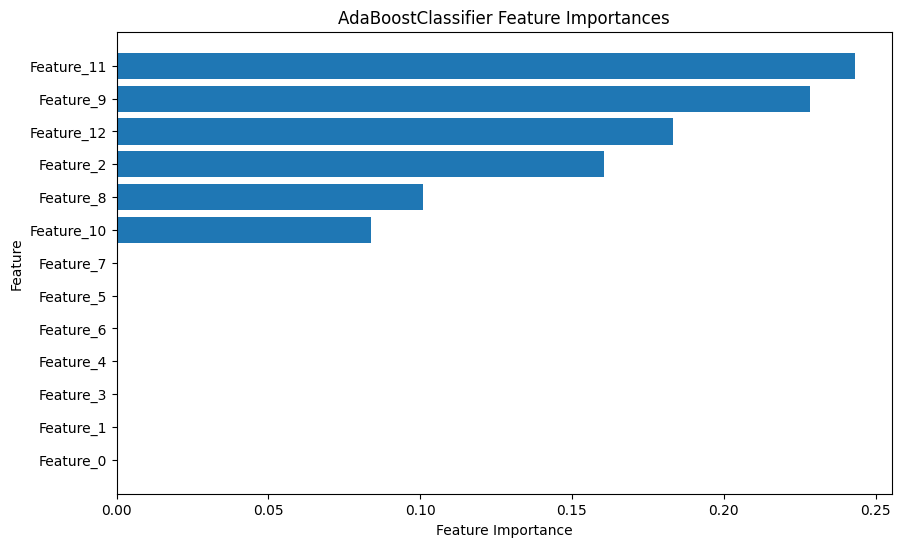

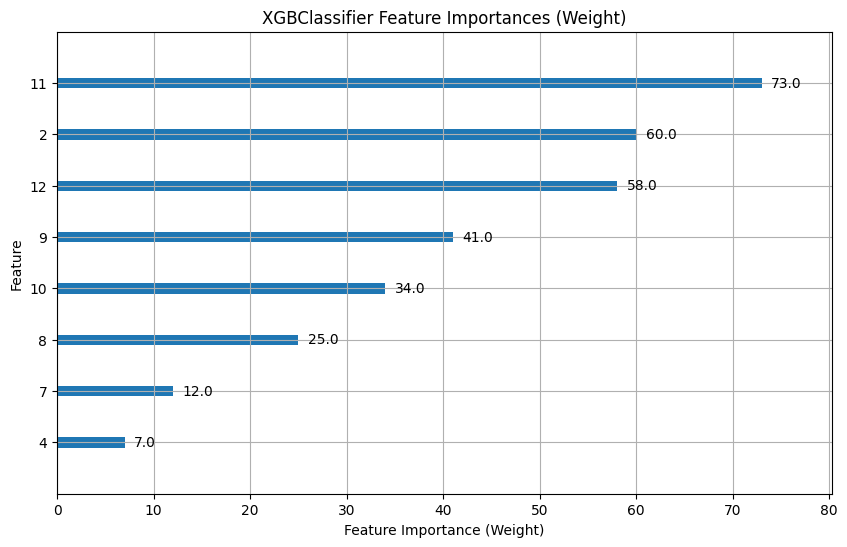

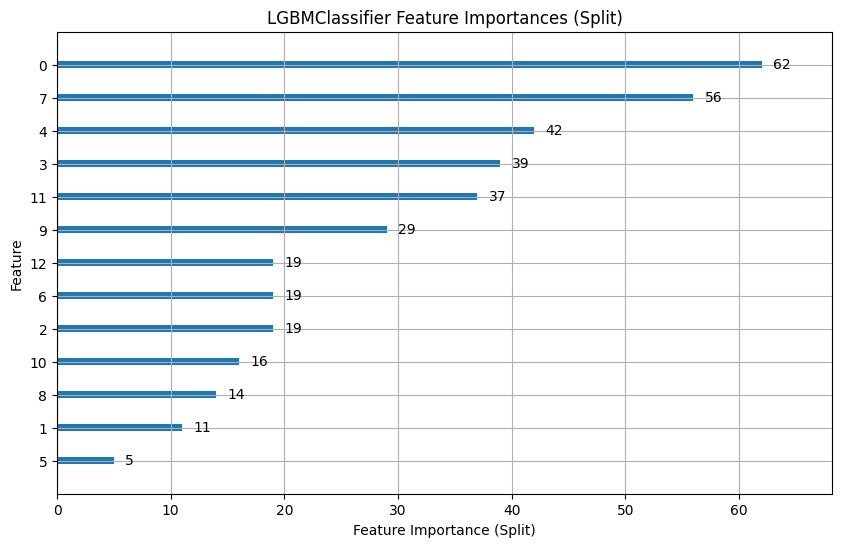

Feature importance plots generated.


In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb

print("Plotting feature importances for each model...")

# Get feature names (assuming 0-indexed columns for X_train)
feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

# Plot Feature Importance for AdaBoostClassifier
plt.figure(figsize=(10, 6))
ada_best_estimator = grid_results['AdaBoost']['best_estimator']
importance_ada = ada_best_estimator.feature_importances_
sorted_idx_ada = importance_ada.argsort()
plt.barh(range(len(sorted_idx_ada)), importance_ada[sorted_idx_ada])
plt.yticks(range(len(sorted_idx_ada)), [feature_names[i] for i in sorted_idx_ada])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("AdaBoostClassifier Feature Importances")
plt.show()

# Plot Feature Importance for XGBClassifier
plt.figure(figsize=(10, 6))
xgb_best_estimator = grid_results['XGBoost']['best_estimator']
xgb.plot_importance(xgb_best_estimator, ax=plt.gca(), importance_type='weight')
plt.title("XGBClassifier Feature Importances (Weight)")
plt.xlabel("Feature Importance (Weight)")
plt.ylabel("Feature")
plt.show()

# Plot Feature Importance for LGBMClassifier
plt.figure(figsize=(10, 6))
lgbm_best_estimator = grid_results['LightGBM']['best_estimator']
lgb.plot_importance(lgbm_best_estimator, ax=plt.gca(), importance_type='split')
plt.title("LGBMClassifier Feature Importances (Split)")
plt.xlabel("Feature Importance (Split)")
plt.ylabel("Feature")
plt.show()

print("Feature importance plots generated.")